d:\Users\jg255\anaconda3\envs\ray310\lib\site-packages\scipy\optimize\_trustregion_constr\projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +


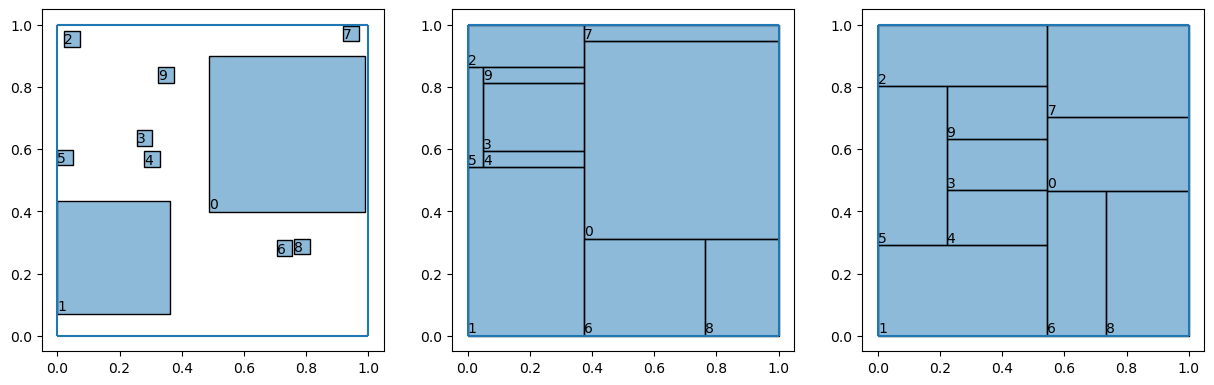

In [1]:
from SquareDivision.src.rectangle_class import Rectangulation

rects = Rectangulation(config={'seed' : 123456})# 1000000000000001})#123456})
rects.execute(num=21)
rects.prepare_constraints()
rects.close_holes()
rects.draw_closed()

In [3]:
rects.holes_idxs

[]

In [31]:
rects.sol.fun

1.0285923859727517

In [29]:
import numpy as np
print(rects.const_trust[-3].A.dot(rects.clinched_rectangles.reshape(-1,5)[:,:-1].flatten()))
print(rects.const_trust[-3].lb)
print(rects.const_trust[-1].fun(rects.clinched_rectangles.reshape(-1,5)[:,:-1].flatten()))
print(rects.const_trust[-1].ub)

[ 0.00000000e+00  5.55111512e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.93889390e-18  2.08166817e-17
 -3.46944695e-17 -1.11022302e-16  0.00000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-2.22044605e-16]
0


In [ ]:
# rects.const_trust[-2].fun(rects.clinched_rectangles.reshape(-1,5)[:,:-1].flatten())
np.round(rects.sol.x.reshape(-1,4))

In [4]:
rects.sol.fun

8.307269916219639

#### Maybe x0 from the graph ?

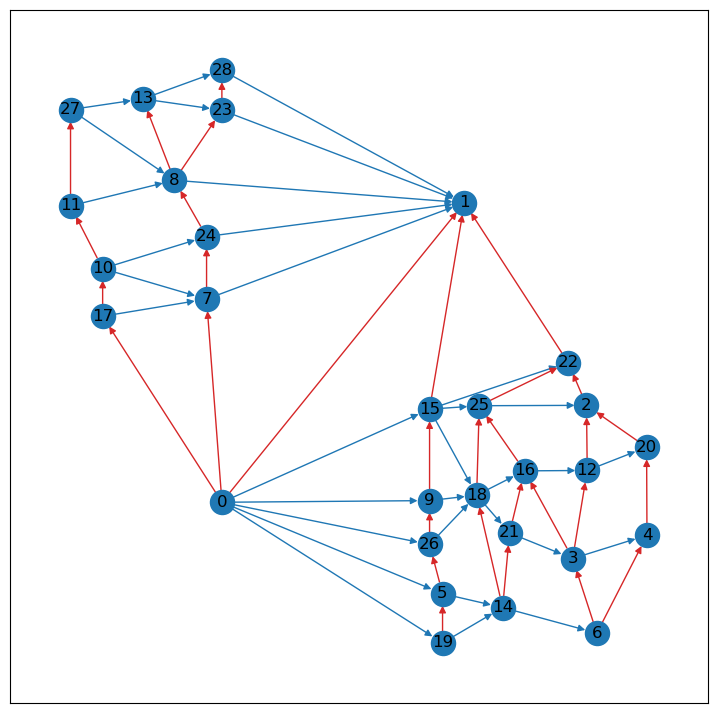

In [52]:
import networkx as nx
import matplotlib.pyplot as plt
H = nx.from_numpy_array(rects.east_neighbours, create_using=nx.DiGraph)# + rects.north_neighbours)
V = nx.from_numpy_array(rects.north_neighbours, create_using=nx.DiGraph)# + rects.north_neighbours)
attrs = { i : {'pos': tuple(row[:2] + 0.5 * row[2:4])} for i, row in enumerate(rects.clinched_rectangles)}
nx.set_node_attributes(H, attrs)
pos = nx.get_node_attributes(H,'pos')
fig, ax = plt.subplots(figsize=(9, 9))
nx.draw_networkx(H, pos=pos, ax=ax,  edge_color='tab:blue' )
nx.draw_networkx_edges(V, pos=pos, ax=ax, edge_color='tab:red')
plt.show()

In [73]:
import numpy as np
a = np.arange(80)
a = a.reshape(-1,4)
a[[5,3,7,0]] = np.arange(16).reshape(-1,4)
a

array([[12, 13, 14, 15],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [16, 17, 18, 19],
       [ 0,  1,  2,  3],
       [24, 25, 26, 27],
       [ 8,  9, 10, 11],
       [32, 33, 34, 35],
       [36, 37, 38, 39],
       [40, 41, 42, 43],
       [44, 45, 46, 47],
       [48, 49, 50, 51],
       [52, 53, 54, 55],
       [56, 57, 58, 59],
       [60, 61, 62, 63],
       [64, 65, 66, 67],
       [68, 69, 70, 71],
       [72, 73, 74, 75],
       [76, 77, 78, 79]])

#### (w,h) Distribution playground

In [3]:
import numpy as np
pts_diag = np.array(
                 [[0.25, 0.25],
                  [0.75, 0.75]])
def tepui(
        base:float=0.05,
        top:float=0.3,
        slope:float=4,
        vertex:float=1,
        pts:np.ndarray=pts_diag
):
    return lambda pt : np.minimum(top, np.maximum(base, vertex - slope * np.min(np.linalg.norm(pts - pt, axis=1))))

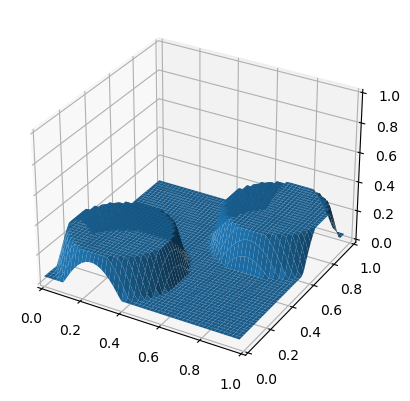

In [6]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

tepui_at = tepui(
        base=0.05,
        top=0.3,
        slope=5,
        vertex=1.5,
)

x = np.arange(0, 1, 0.02)
y = np.arange(0, 1, 0.02)

X, Y = np.meshgrid(x, y)
points = np.array([X,Y])

nu = np.apply_along_axis(tepui_at, 0, points)

fig = plt.figure()
ax:Axes = fig.add_subplot(projection='3d')
ax.axes.set_xlim3d(left=0, right=1) 
ax.axes.set_ylim3d(bottom=0, top=1) 
ax.axes.set_zlim3d(bottom=0, top=1) 
ax.plot_surface(X, Y, nu)
plt.show()

In [8]:
from SquareDivision.src.generators import uniform_pts
random_points = uniform_pts(n=5)
vals = np.apply_along_axis(tepui_at, 1, random_points)
vals
# rng = np.random.default_rng(1234)
# rng.uniform([xmin, ymin], [xmax, ymax], size=(n, 2))

array([0.4       , 0.05      , 0.05      , 0.05      , 0.36100765])

In [24]:
import numpy as np
norma_a = np.array([[1, 1],[2, 3],[4, 5],[6, 7]]).astype(float)
a=np.ones(shape=(2,2))
# recip_a = np.reciprocal(a)
# np.diagonal(norma_a.T.dot(recip_a)).sum()
# (recip_a**2)*norma_a
# norma_a[:,0] * norma_a[:,1]
type(a[1,1])

numpy.float64

In [32]:
li = [[3, 5],[2,7]]
((left, right), [down, up]) = li

In [52]:
((left, right), (down, up)) = [[1, 30], [27, 39]]
mid_pts = rects.clinched_rectangles[:,:2] + 0.5 * rects.clinched_rectangles[:,2:4]
X_lb = rects.clinched_rectangles[left, 0] + rects.clinched_rectangles[left, 2]
X_ub = rects.clinched_rectangles[right, 0]
Y_lb = rects.clinched_rectangles[down, 1] + rects.clinched_rectangles[down, 3]
Y_ub = rects.clinched_rectangles[up, 1]
# np.where(X_lb < mid_pts[0])#< X_ub)# and np.where(Y_lb<mid_pts[1]<Y_ub)
((X_lb < mid_pts[:,0])* ( mid_pts[:,0] < X_ub) * (Y_lb < mid_pts[:,1]) * (mid_pts[:,1] < Y_ub)).sum()
# mid_pts[:,0]< X_ub

1